In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Explore

In [3]:
data=pd.read_csv(r"C:\Users\Asus\Downloads\archive (3)\imdb_movies.csv")
data.head()

,movie_id,title,year,certificate,runtime_minutes,genre,rating,metascore,description,director,stars,votes,gross_millions
0,tt1000835,Dark Love 728,2004,PG-13,103,"Action, Musical",9.5,NaN,A critically acclaimed action masterpiece.,Park Chan-wook,"Matt Damon, Leonardo DiCaprio, Meryl Streep, R...",774648,204.79
1,tt1000768,First Awakening 661,2012,R,159,"War, Animation",9.5,NaN,An epic war tale directed by Ridley Scott.,Ridley Scott,"Matt Damon, Jack Nicholson, Chris Hemsworth, Z...",297518,951.58
2,tt1000652,The Dreams 545,2008,R,77,"Action, Mystery, War",9.5,100.0,An epic action tale directed by Spike Lee.,Spike Lee,"Natalie Portman, Mark Ruffalo, Viola Davis, Ha...",583752,372.85
3,tt1000538,Last Mission 431,2019,PG-13,116,Biography,9.5,NaN,A critically acclaimed biography masterpiece.,Jordan Peele,"Al Pacino, Gary Oldman, Keanu Reeves, Kate Win...",187450,NaN
4,tt1000159,The Story 52,2000,R,126,Mystery,9.5,99.0,A mystery film set in 2000.,Park Chan-wook,"Zendaya, Chris Hemsworth, Viola Davis, Mark Ru...",642106,252.83


In [5]:
data.shape

(1000, 13)

In [9]:
data.columns

Index(['movie_id', 'title', 'year', 'certificate', 'runtime_minutes', 'genre',
       'rating', 'metascore', 'description', 'director', 'stars', 'votes',
       'gross_millions'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1000 non-null   object 
 1   title            1000 non-null   object 
 2   year             1000 non-null   int64  
 3   certificate      1000 non-null   object 
 4   runtime_minutes  1000 non-null   int64  
 5   genre            1000 non-null   object 
 6   rating           1000 non-null   float64
 7   metascore        645 non-null    float64
 8   description      1000 non-null   object 
 9   director         1000 non-null   object 
 10  stars            1000 non-null   object 
 11  votes            1000 non-null   int64  
 12  gross_millions   704 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 101.7+ KB


In [13]:
data.duplicated().sum()

0

In [15]:
data.nunique()

movie_id           1000
title               994
year                 72
certificate           6
runtime_minutes      96
genre               461
rating               51
metascore            62
description         448
director             37
stars              1000
votes               987
gross_millions      700
dtype: int64

In [17]:
data.isnull().sum()

movie_id             0
title                0
year                 0
certificate          0
runtime_minutes      0
genre                0
rating               0
metascore          355
description          0
director             0
stars                0
votes                0
gross_millions     296
dtype: int64

# Data Cleaning

In [19]:
data.drop(columns=['movie_id','director','year'] , inplace=True)
data.head()

,title,certificate,runtime_minutes,genre,rating,metascore,description,stars,votes,gross_millions
0,Dark Love 728,PG-13,103,"Action, Musical",9.5,NaN,A critically acclaimed action masterpiece.,"Matt Damon, Leonardo DiCaprio, Meryl Streep, R...",774648,204.79
1,First Awakening 661,R,159,"War, Animation",9.5,NaN,An epic war tale directed by Ridley Scott.,"Matt Damon, Jack Nicholson, Chris Hemsworth, Z...",297518,951.58
2,The Dreams 545,R,77,"Action, Mystery, War",9.5,100.0,An epic action tale directed by Spike Lee.,"Natalie Portman, Mark Ruffalo, Viola Davis, Ha...",583752,372.85
3,Last Mission 431,PG-13,116,Biography,9.5,NaN,A critically acclaimed biography masterpiece.,"Al Pacino, Gary Oldman, Keanu Reeves, Kate Win...",187450,NaN
4,The Story 52,R,126,Mystery,9.5,99.0,A mystery film set in 2000.,"Zendaya, Chris Hemsworth, Viola Davis, Mark Ru...",642106,252.83


In [21]:
data['certificate'].head(10)

0    PG-13
1        R
2        R
3    PG-13
4        R
5        R
6       PG
7       PG
8       PG
9    PG-13
Name: certificate, dtype: object

In [23]:
data['metascore'].fillna(data['metascore'].mean() ,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_9664\1191033535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['metascore'].fillna(data['metascore'].mean() ,inplace=True)


In [25]:
median_value = data["gross_millions"].median()
data["gross_millions"].fillna(median_value, inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_9664\132768396.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["gross_millions"].fillna(median_value, inplace=True)


In [27]:
data["genre"] = data["genre"].str.split(", ")
df_exploded = data.explode("genre")


In [29]:
genre_counts = df_exploded["genre"].value_counts()
common_genres = genre_counts[genre_counts > 20].index

df_filtered = df_exploded[df_exploded["genre"].isin(common_genres)]


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1000 non-null   object 
 1   certificate      1000 non-null   object 
 2   runtime_minutes  1000 non-null   int64  
 3   genre            1000 non-null   object 
 4   rating           1000 non-null   float64
 5   metascore        1000 non-null   float64
 6   description      1000 non-null   object 
 7   stars            1000 non-null   object 
 8   votes            1000 non-null   int64  
 9   gross_millions   1000 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [33]:
data.describe()

,runtime_minutes,rating,metascore,votes,gross_millions
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,120.624000,6.944000,69.400000,1.859305e+05,252.569140
std,19.318847,0.955896,9.965948,3.500846e+05,147.350412
min,70.000000,4.100000,30.000000,1.000000e+03,5.200000
25%,108.000000,6.300000,67.000000,2.423900e+04,174.787500
50%,121.000000,6.900000,69.400000,6.636300e+04,235.390000
75%,133.000000,7.600000,73.000000,1.758815e+05,297.387500
max,198.000000,9.500000,100.000000,2.500000e+06,987.170000


# Data Analysis

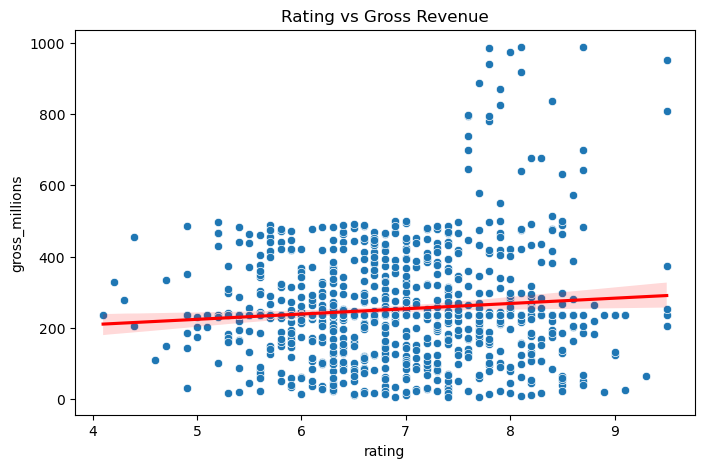

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x="rating", y="gross_millions")
sns.regplot(data=data, x="rating", y="gross_millions", scatter=False, color="red")
plt.title("Rating vs Gross Revenue")
plt.show()


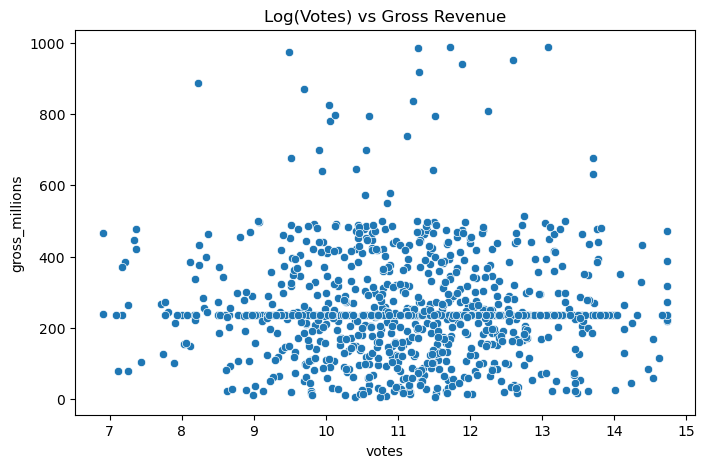

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log1p(data["votes"]), y=data["gross_millions"])
plt.title("Log(Votes) vs Gross Revenue")
plt.show()

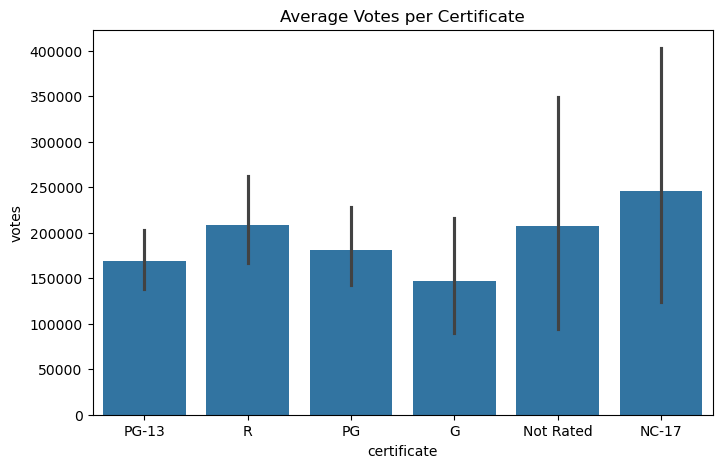

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x="certificate", y="votes", estimator="mean")
plt.title("Average Votes per Certificate")
plt.show()


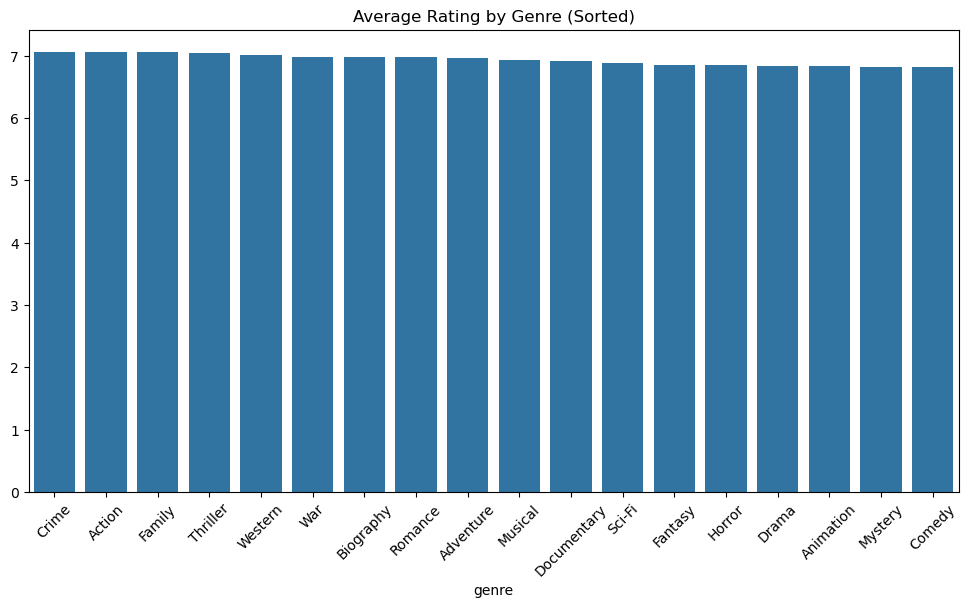

In [41]:
genre_mean = (
    df_filtered.groupby("genre")["rating"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_mean.index, y=genre_mean.values)
plt.xticks(rotation=45)
plt.title("Average Rating by Genre (Sorted)")
plt.show()



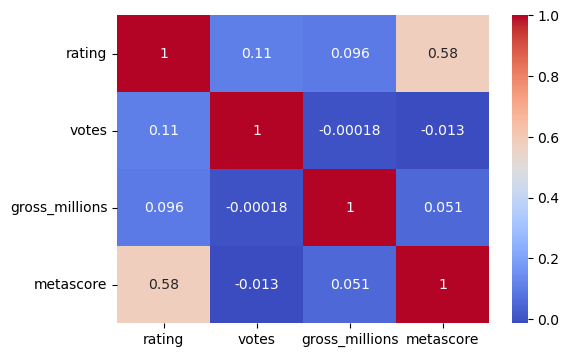

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(data[["rating","votes","gross_millions","metascore"]].corr(),
            annot=True, cmap="coolwarm")
plt.show()


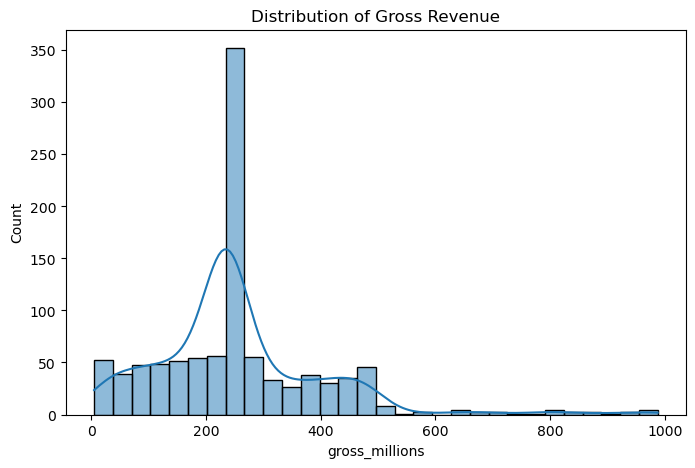

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(data["gross_millions"], bins=30, kde=True)
plt.title("Distribution of Gross Revenue")
plt.show()


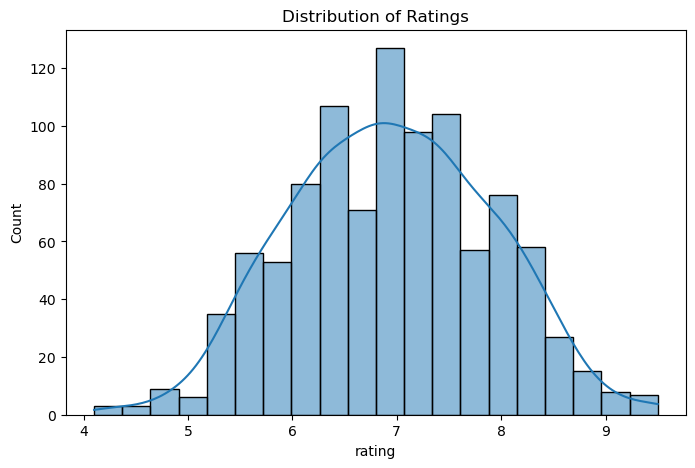

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(data["rating"], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.show()


In [1]:
plt.figure(figsize=(8,5))
certificate_median_votes = data.groupby("certificate")["votes"].median().sort_values()
sns.barplot(x=certificate_median_votes.values, y=certificate_median_votes.index, palette="magma")
plt.xlabel("Median Votes")
plt.ylabel("Certificate")
plt.title("Votes by Certificate (Horizontal Bar)")
plt.show()


NameError: name 'plt' is not defined